# Árboles de Decisión

Vamos a boludear un poco con árboles de decisión

Construyamos un dataset fácil para un concepto relativamente sencillo: que reconozca el cuadrado $[0.5, 1] \times [0.5, 1]$

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

# Vamos a hacer un concepto simple:
# (X, Y) es 1 si X, Y están en el cuadrado (0.5, 1)

X = np.random.uniform(0, 1, 1000)
Y = np.random.uniform(0, 1, 1000)

df = pd.DataFrame({'X': X, 'Y': Y})

df['spam'] = df.apply(lambda row: row['X'] > 0.5 and row['Y'] > 0.5, axis=1)

df.iloc[0:10]

Populating the interactive namespace from numpy and matplotlib


,X,Y,spam
0,0.720561,0.143366,False
1,0.237129,0.754423,False
2,0.207260,0.236433,False
3,0.791432,0.425309,False
4,0.854899,0.949324,True
5,0.237952,0.687258,False
6,0.378648,0.951020,False
7,0.984482,0.641017,True
8,0.450008,0.297651,False
9,0.638253,0.367939,False


Grafiquemos el conjunto

Obs: Esto lo copié de la página de pandas http://pandas.pydata.org/pandas-docs/stable/visualization.html

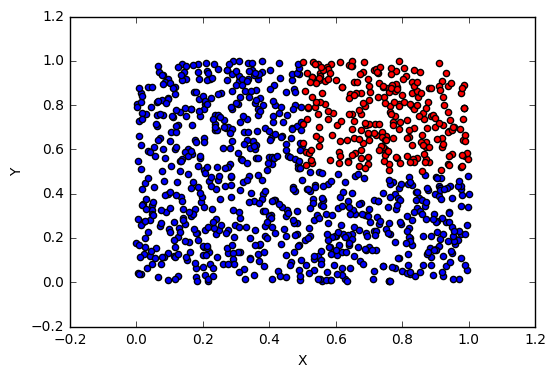

In [2]:
def plot_dataset(df):
    ax = df[df.spam == False].plot.scatter(x='X', y='Y', color='Blue')

    df[df.spam == True].plot.scatter(x='X', y='Y', color='red', ax=ax)

plot_dataset(df)

In [3]:

data = df[['X', 'Y']].values

gini_clf = DecisionTreeClassifier(criterion="gini")
entropy_clf = DecisionTreeClassifier(criterion="entropy")

gini_tree = gini_clf.fit(data, df['spam'])
entropy_tree = entropy_clf.fit(data, df['spam'])

# Grafiquemos el árbol


Esto sacado de https://github.com/scikit-learn/scikit-learn/issues/6261

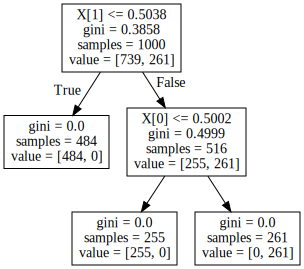

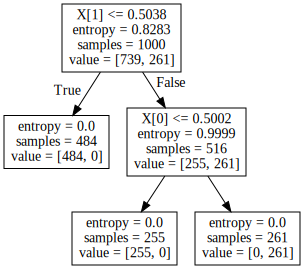

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import display
import tempfile
import graphviz


def create_dotgraph(tree):
    tmpfile = tempfile.NamedTemporaryFile(mode='r+')  
    export_graphviz(tree, out_file=tmpfile.name)
    
    with open(tmpfile.name) as f:
        contents = f.read()
        display(graphviz.Source(contents))


# Por alguna razón no puedo meter esto en la función 
create_dotgraph(gini_tree)
create_dotgraph(entropy_tree)
    


# Ejemplo más complejo

Intentemos reconocer una esfera bidimensional

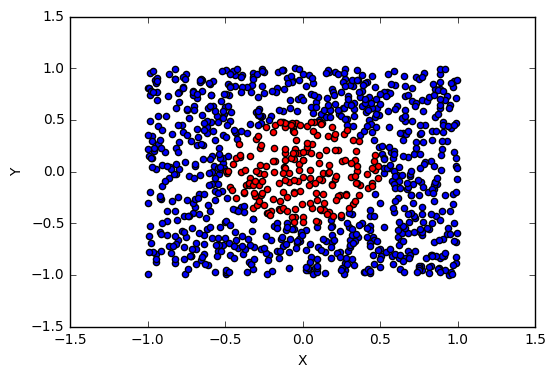

In [22]:
X = np.random.uniform(-1, 1, 1000)
Y = np.random.uniform(-1, 1, 1000)

df = pd.DataFrame({'X': X, 'Y': Y})


df['spam'] = df.apply(lambda row: np.linalg.norm(row) < 0.5, axis=1)

plot_dataset(df)

In [23]:

data = df[['X', 'Y']].values

gini_clf = DecisionTreeClassifier(criterion="gini")
entropy_clf = DecisionTreeClassifier(criterion="entropy")

gini_tree = gini_clf.fit(data, df['spam'])
entropy_tree = entropy_clf.fit(data, df['spam'])

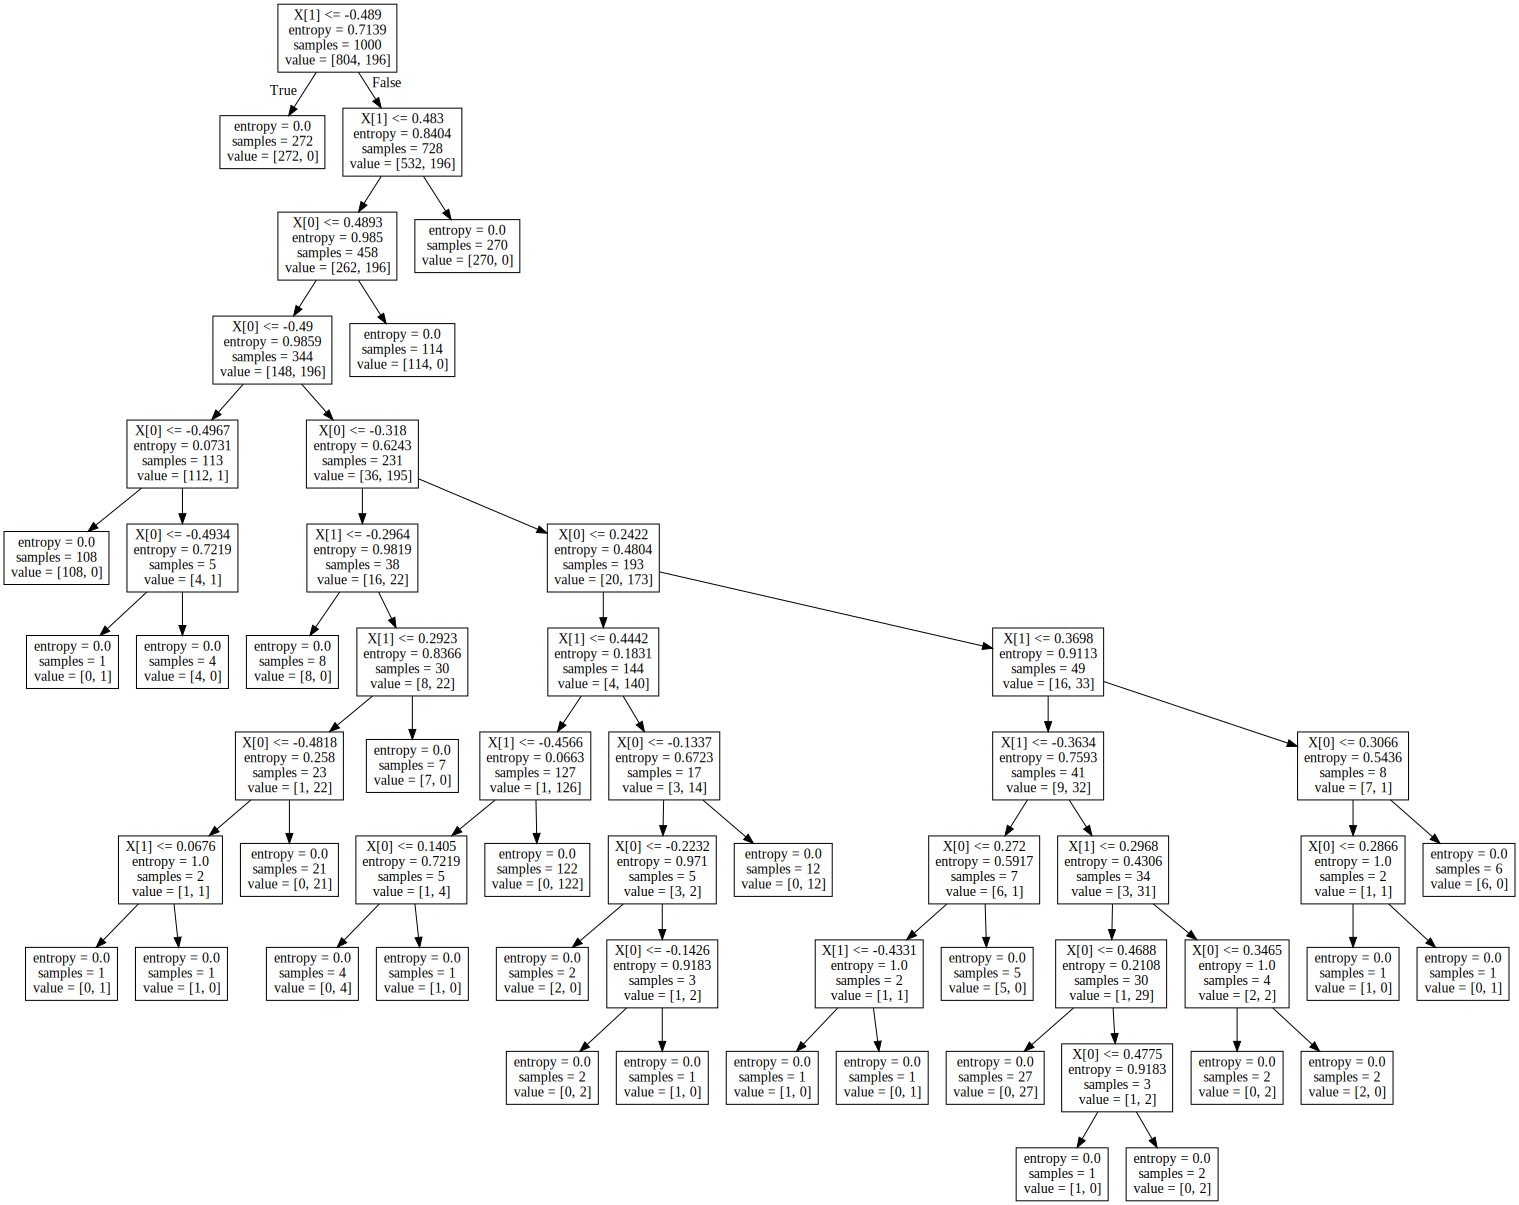

In [24]:
create_dotgraph(entropy_tree)

# Exploración de hiperparámetros

Busquemos la configuración de hiperparámetros del árbol que mejor se ajusta a nuestro conjunto

Primero, veamos los argumentos que recibe DecisionTreeClassifier

In [25]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |        - If int, then consider `max_features` features at each split.
 |        - If float, then `max_features` is a percentage and
 |         

In [40]:
from sklearn.grid_search import GridSearchCV

options = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2, 11), 
}


for scoring in ['accuracy', 'f1', 'precision']:    
    clf = DecisionTreeClassifier()

    print("=" * 80 + "\n")
    print("Scoring {}".format(scoring))

    grid_search = GridSearchCV(clf, scoring=scoring, cv=10, param_grid=options, n_jobs=8)
    grid_search.fit(df[['X', 'Y']], df['spam'])

    #for value in grid_search.grid_scores_:
    #    print value

    #for score in grid_search.grid_scores_:
    #    print score

    print "Mejor combinación: {}".format(grid_search.best_params_)
    print "Mejor valor: {}".format(grid_search.best_score_)



Scoring accuracy
Mejor combinación: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 10}
Mejor valor: 0.976

Scoring f1


/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted 

Mejor combinación: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 10}
Mejor valor: 0.938918850934

Scoring precision


/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/marat/.pyenv/versions/2.7.11/envs/aprendizaje/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

Mejor combinación: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 10}
Mejor valor: 0.956853030303
